# Test Module 1

### Naive Exact Matching Algorithm Function

In [ ]:
def naive(p, t):
    occurrences = []
    for i in range(len(t) - len(p) + 1):  # loop over alignments
        match = True
        for j in range(len(p)):  # loop over characters
            if t[i+j] != p[j]:  # compare characters
                match = False
                break
        if match:
            occurrences.append(i)  # all chars matched; record
    return occurrences

### Reverse Complement Function

In [ ]:
def reverseComplement(s):
    complement = {'A': 'T', 'C': 'G', 'G': 'C', 'T': 'A', 'N': 'N'}
    t = ''
    for base in s:
        t = complement[base] + t
    return t

### Parsing a DNA reference genome from a file in the FASTA format

In [ ]:
def readGenome(filename):
    genome = ''
    with open(filename, 'r') as f:
        for line in f:
            # ignore header line with genome information
            if not line[0] == '>':
                genome += line.rstrip()
    return genome

### Parsing the read and quality strings from a FASTQ file containing sequencing reads

In [ ]:
def readFastq(filename):
    sequences = []
    qualities = []
    with open(filename) as fh:
        while True:
            fh.readline()  # skip name line
            seq = fh.readline().rstrip()  # read base sequence
            fh.readline()  # skip placeholder line
            qual = fh.readline().rstrip() # base quality line
            if len(seq) == 0:
                break
            sequences.append(seq)
            qualities.append(qual)
    return sequences, qualities

### Implement the naive_with_rc function


In [ ]:
def naive_with_rc(p, t):
    p_rev = reverseComplement(p)
    occurrences = []
    for i in range(len(t) - len(p) + 1):  # loop over alignments
        match = True
        for j in range(len(p)):  # loop over characters
            if t[i+j] != p[j]:  # compare characters
                match = False
                break
        if not match:
            match = True
            for j in range(len(p)):  # loop over characters
                if t[i + j] != p_rev[j]:  # compare characters
                    match = False
                    break
        if match:
            occurrences.append(i)  # all chars matched; record
    return occurrences

#### Example 1
##### (expected result [10, 23])

In [ ]:
p = 'CCC'
ten_as = 'AAAAAAAAAA'
t = ten_as + 'CCC' + ten_as + 'GGG' + ten_as
occurrences = naive_with_rc(p, t)
print(occurrences)
print(t)


[10, 23]
AAAAAAAAAACCCAAAAAAAAAAGGGAAAAAAAAAA


#### Example 2
##### (expected result [10, 24])

In [ ]:
p = 'CGCG'
t = ten_as + 'CGCG' + ten_as + 'CGCG' + ten_as
occurrences = naive_with_rc(p, t)
print(occurrences)
print(t)

[10, 24]
AAAAAAAAAACGCGAAAAAAAAAACGCGAAAAAAAAAA


#### Example 3

##### Downloading FASTA file

In [ ]:
!wget http://d396qusza40orc.cloudfront.net/ads1/data/phix.fa

--2022-06-22 23:58:39--  http://d396qusza40orc.cloudfront.net/ads1/data/phix.fa
Resolving d396qusza40orc.cloudfront.net (d396qusza40orc.cloudfront.net)... 108.157.172.179, 108.157.172.183, 108.157.172.113, ...
Connecting to d396qusza40orc.cloudfront.net (d396qusza40orc.cloudfront.net)|108.157.172.179|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5528 (5.4K) [application/octet-stream]
Saving to: ‘phix.fa’

phix.fa             100%[===================>]   5.40K  --.-KB/s    in 0s      

2022-06-22 23:58:39 (629 MB/s) - ‘phix.fa’ saved [5528/5528]



##### Reading FASTA file Function

In [ ]:
def readGenome(filename):
    genome = ''
    with open(filename, 'r') as f:
        for line in f:
            # ignore header line with genome information
            if not line[0] == '>':
                genome += line.rstrip()
    return genome

##### Parsing reads from FASTA file

In [ ]:
phix_genome = readGenome('phix.fa')

##### Using the Naive Reverse Complement Function

In [ ]:
occurrences = naive_with_rc('ATTA', phix_genome)

##### Printing the result of the Naive Reverse Complement Function (expected result offset of leftmost occurrence of the pattern: 62)

In [ ]:
print('offset of leftmost occurrence: %d' % min(occurrences))

offset of leftmost occurrence: 62


##### Printing the number of occurences of the pattern (expected result occurrences: 60)

In [ ]:
print('# occurrences: %d' % len(occurrences))

# occurrences: 60


##### Print the List occurences

In [ ]:
print("# positions of the pattern in the genome: %s" % occurrences)

# positions of the pattern in the genome: [62, 82, 103, 245, 341, 373, 440, 639, 707, 710, 712, 823, 845, 961, 997, 1005, 1084, 1246, 1269, 1336, 1446, 1455, 1576, 1602, 1628, 1722, 2168, 2226, 2329, 2389, 2420, 2540, 2549, 2600, 2752, 2886, 2895, 3083, 3106, 3285, 3313, 3566, 3611, 3781, 3898, 3993, 4017, 4183, 4260, 4307, 4309, 4435, 4437, 4457, 4606, 4624, 4696, 4753, 4819, 5193]


### Another Genome

##### Downloading FASTA file

In [ ]:
!wget http://d396qusza40orc.cloudfront.net/ads1/data/lambda_virus.fa

--2022-06-22 23:59:17--  http://d396qusza40orc.cloudfront.net/ads1/data/lambda_virus.fa
Resolving d396qusza40orc.cloudfront.net (d396qusza40orc.cloudfront.net)... 108.157.172.183, 108.157.172.181, 108.157.172.179, ...
Connecting to d396qusza40orc.cloudfront.net (d396qusza40orc.cloudfront.net)|108.157.172.183|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 49270 (48K) [application/octet-stream]
Saving to: ‘lambda_virus.fa’

lambda_virus.fa     100%[===================>]  48.12K  --.-KB/s    in 0.05s   

2022-06-22 23:59:17 (963 KB/s) - ‘lambda_virus.fa’ saved [49270/49270]



##### Reading FASTA file Function

In [ ]:
def readGenome(filename):
    genome = ''
    with open(filename, 'r') as f:
        for line in f:
            # ignore header line with genome information
            if not line[0] == '>':
                genome += line.rstrip()
    return genome

##### Parsing reads from FASTA file

In [ ]:
lambda_genome = readGenome('lambda_virus.fa')

##### Using the Naive Reverse Complement Function

In [ ]:
occurrences = naive_with_rc('AGTCGA', lambda_genome)

##### Printing the result of the Naive Reverse Complement Function 

In [ ]:
print('offset of leftmost occurrence: %d' % min(occurrences))

offset of leftmost occurrence: 450


##### Printing the number of occurences of the pattern 

In [ ]:
print('# occurrences: %d' % len(occurrences))

# occurrences: 9


##### Print the List occurences

In [ ]:
print("# positions of the pattern in the genome: %s" % occurrences)

# positions of the pattern in the genome: [450, 1908, 2472, 18005, 23320, 33657, 41927, 44806, 45369]


### Create a Naive function to find approximate matches
#### (Code obtained from the following source:
 https://www.cs.jhu.edu/~langmea/resources/lecture_notes/approximate_matching.pdf)
 #### (Hamming distance is the the number aof mismatches that is acceptable)

In [ ]:
def naive_2mm(p,	t,	maxHammingDistance=2):
				occurrences	=	[]
				for	i	in range(0,	len(t)	- len(p)	+ 1):	#	for	all	alignments
								nmm	= 0
								for	j	in range(0,	len(p)):										#	for	all	characters
												if	t[i+j]	!=	p[j]:															#	does	it	match?
																nmm	+= 1																					#	mismatch
																if	nmm	>	maxHammingDistance:
																				break																				#	exceeded	maximum	distance
								if	nmm	<=	maxHammingDistance:
												#	approximate	match;	return	pair	where	first	element	is	the
												#	offset	of	the	match	and	second	is	the	Hamming	distance
												occurrences.append((i,	nmm))
				return	occurrences



### Example 1
#### (expected result [10, 24, 38])

In [ ]:
p = 'CTGT'
ten_as = 'AAAAAAAAAA'
t = ten_as + 'CTGT' + ten_as + 'CTTT' + ten_as + 'CGGG' + ten_as
occurrences = naive_2mm(p, t)
print(occurrences)

[(10, 0), (24, 1), (38, 2)]


### Example 2 (Phix Genome)

In [ ]:
!wget http://d396qusza40orc.cloudfront.net/ads1/data/phix.fa

--2022-06-23 00:01:00--  http://d396qusza40orc.cloudfront.net/ads1/data/phix.fa
Resolving d396qusza40orc.cloudfront.net (d396qusza40orc.cloudfront.net)... 108.157.172.181, 108.157.172.183, 108.157.172.179, ...
Connecting to d396qusza40orc.cloudfront.net (d396qusza40orc.cloudfront.net)|108.157.172.181|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5528 (5.4K) [application/octet-stream]
Saving to: ‘phix.fa.1’

phix.fa.1           100%[===================>]   5.40K  --.-KB/s    in 0s      

2022-06-23 00:01:00 (614 MB/s) - ‘phix.fa.1’ saved [5528/5528]



### Read Genome Function

In [ ]:
def readGenome(filename):
    genome = ''
    with open(filename, 'r') as f:
        for line in f:
            # ignore header line with genome information
            if not line[0] == '>':
                genome += line.rstrip()
    return genome

### Parsing Phix Genome

In [ ]:
phix_genome = readGenome('phix.fa')

### Running Naive_2mm Function

In [ ]:
occurrences = naive_2mm('GATTACA', phix_genome)

### Print Leftmost occurences

In [ ]:
print("offset of leftmost occurrence:", min(occurrences))

offset of leftmost occurrence: (10, 2)


### Print Number of Occurrences

In [ ]:
print('# occurrences: %d' % len(occurrences))

# occurrences: 79


### Lambda Genome

In [ ]:
occurrences = naive_2mm('TTCAAGCC', lambda_genome)

### Leftmost occurence of the pattern 'TTCAAGCC'

In [ ]:
print("offset of leftmost occurrence:", min(occurrences))

offset of leftmost occurrence: (45, 2)


### Number of occurences of the pattern 'TTCAAGCC'

In [ ]:
print('# occurrences: %d' % len(occurrences))

# occurrences: 191


### Leftmost occurence of 'AGGAGGTT'in the Lambda genome

In [ ]:
occurrences = naive_2mm('AGGAGGTT', lambda_genome)

In [ ]:
print("offset of leftmost occurrence:", min(occurrences))

offset of leftmost occurrence: (49, 2)


### Analysing reads by position

#### Downloading the FASTQ file from the URL link below

In [ ]:
!wget --no-check  https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR037900_1.first1000.fastq

--2022-06-23 00:02:01--  https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR037900_1.first1000.fastq
Resolving d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)... 18.64.171.60, 18.64.171.223, 18.64.171.149, ...
Connecting to d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)|18.64.171.60|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 241626 (236K) [application/octet-stream]
Saving to: ‘ERR037900_1.first1000.fastq’

ERR037900_1.first10 100%[===================>] 235.96K  --.-KB/s    in 0.09s   

2022-06-23 00:02:01 (2.54 MB/s) - ‘ERR037900_1.first1000.fastq’ saved [241626/241626]



### Parsing the sequences and quality strings

In [ ]:
def readFastq(filename):
    sequences = []
    qualities = []
    with open(filename) as fh:
        while True:
          fh.readline()
          seq = fh.readline().rstrip()
          fh.readline()
          qual = fh.readline().rstrip()
          if len(seq) == 0:
              break
          sequences.append(seq)
          qualities.append(qual)
    return sequences, qualities

seqs, quals = readFastq('ERR037900_1.first1000.fastq')

### Print out the first five sequences

In [ ]:
print(seqs[:5])

['TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCNAACCCTAACCCTAACCCTAACCCTAACCCTAAC', 'TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCNAACCCTAACCCTAACCCTAACCCTNACCCTAAC', 'TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCNAACCCTAACCCTAACCCTAACCCTAACCCTAAC', 'TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCNAACCCTAACCCTAACCCTAACCCTAACCCTACC', 'AACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTNACCCTAACCCTAACCCTAACCCTAAACCTAACC']


### Print out the first five quality strings

In [ ]:
print(quals[:5])

['HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHGFHHHFHFFHHHHHGHHFHEH@4#55554455HGFBF<@C>7EEF@FBEDDD<=C<E', 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHCHHHHEHHBA#C>@54455C/7=CGHEGEB;C############', 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHGHHHHHHHHHHHHHDHHHDEHHHHFGIHEHEGGGF4#45655366GIGEHAGBG################', 'HHHHHHHHHHHHHHHHHHHHHHHHHIHHHHHHHHHHHHHHHHHHHHHHIHHHHHIHFHHHIHHHHD#ECA54655GGIBH?BD@+BCBF?5A=::>8?##', 'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHIHIHEHHIGHIFFHIIGF6#555:2=7=CB;?3CAACBAC2B###########']


### Phred33 to Quality Scores

In [ ]:
def phred33ToQ(qual):
    return ord(qual) - 33

### Create Histogram of Quality Scores

In [ ]:
def createHist(qualities):
    # Create a histogram of quality scores
    hist = [0]*len(qualities[0])
    for qual in qualities:
        for i in range(len(qual)):
            q = phred33ToQ(qual[i])
            hist[i] += q
    return hist

h = createHist(quals)
print(h)

[38435, 38460, 38400, 38428, 38417, 38382, 38362, 38364, 38325, 38343, 38194, 38154, 38089, 38152, 38153, 38099, 38055, 38041, 38067, 38150, 38087, 37989, 38009, 37909, 38028, 37576, 37514, 37503, 37578, 37552, 37629, 37555, 37548, 37433, 37402, 37343, 37198, 37126, 37158, 36904, 36742, 36677, 36645, 36493, 36509, 36375, 36205, 35974, 35847, 35673, 34832, 34739, 34399, 34402, 34025, 33025, 32882, 32741, 32573, 32224, 30805, 30666, 30343, 30131, 29463, 17891, 4526, 17881, 17865, 17852, 17466, 17131, 17134, 17098, 16852, 23745, 23958, 23221, 22902, 22366, 20904, 20584, 20383, 19767, 19095, 18061, 17757, 17152, 16972, 16286, 14811, 14679, 14310, 14152, 13734, 12538, 12278, 12179, 11676, 11561]


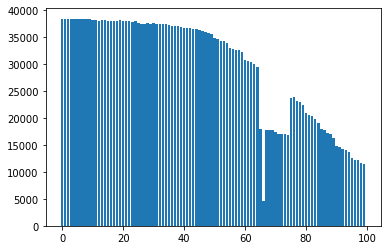

In [ ]:
%matplotlib inline 
import matplotlib.pyplot as plt
plt.bar(range(len(h)), h)
plt.show()

### Correct Answers http://binf.gmu.edu/swang36/NGS/Project1_Naive_Exact.html